In [6]:
from sklearn.datasets import make_blobs 
from nnfs.datasets import spiral_data
import matplotlib.pyplot as plt
import numpy as np
from Neural_Network import*

####
Generation du datasets

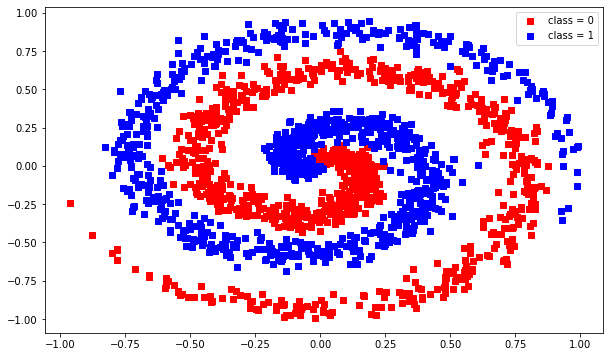

In [7]:
X, y = spiral_data(samples = 1000 , classes = 2)

# Transpose the data
X = X.T
y = y.T

# Display the data
color = ['red', 'blue', 'black']
fig0 = plt.figure(figsize=(10, 6))
for i in range(2):                # 3 refer to the number of classes
    plt.scatter(X[0, y==i], X[1, y==i], label = 'class = '+str(i), marker='s', c = color[i])
    plt.legend()

In [3]:
### CONSTANTS DEFINING THE MODEL ####
n_x = X.shape[0]     # num_px * num_px * 3
n_h1 = 64
n_y = 1
epochs = 10001

In [9]:
X.shape

(2, 2000)

#

In [4]:
# create an empty array for losses and accuracy
overall_loss_list = [] 
accuracy_list = []
learning_rate_list = []

# create the first dense layer with n_h1 neurons and n_x inputs
dense1 = Layer_Dense(n_h1, n_x, weight_regularizer_L2=5e-4, bias_regularizer_L2=5e-4)

# Create ReLU activation object (to be used with Dense layer):
activation1 = Relu()

# # create a dropout layer
# dropout1 = Layer_Dropout(rate = 0.1) # dropout of 10 %

# Create an another dense layer containing n_y neurons and will take as input the output of
# the last layer of n_h1 neurons
dense2 = Layer_Dense(n_y, n_h1)

activation2 = Activation_Sigmoid()

# Create Softmax classifier's combined loss and activation
loss_function = Loss_BinaryCrossentropy()

# Create an optimizer
optimizer = Optimizer_Adam(learning_rate = 0.001, decay = 5e-7, epsilon = 1e-7, beta_1 = 0.9, beta_2 = 0.999)

for epoch in range(epochs):
    
    # ******************  FORWARD PASS  *********************************
    # Pass the features of all the samples through the first dense layer
    dense1.forward(X)
    
    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)
    
    # # Perform a forward pass of the activations into the dropout layers
    # dropout1.forward(activation1.output)
    
    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)
    
    activation2.forward(dense2.output)
    
    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns an unregularized loss
    loss = loss_function.forward(activation2.output, y)
    
    # regularization loss
    regularization_loss = loss_function.regularization_loss(dense1) + \
                            loss_function.regularization_loss(dense2)
    
    #compute the overall loss
    overall_loss = loss + regularization_loss
    
    # fill the loss list
    overall_loss_list.append(overall_loss)
    
    # *******************  PREDICTIONS  *********************************
    # Calculate accuracy of the output layer and targets
    # take the max values along the row
    predictions = (activation2.output > 0.5)*1
    
    # If labels are one-hot encoded,
    # turn them into discrete values
    if len(y.shape) == 2 :
        y = np.argmax(y, axis = 0)
    accuracy = np.mean(predictions == y)
    
    # fill the accuracy list
    accuracy_list.append(accuracy)
    
    # verbose effect 
    if epoch%100 == 0:
        print('-> epoch ' + str(epoch) + ' ...loss = ' + str(np.round(overall_loss, 3)) + ' ...accuracy = ' + str(np.round(accuracy, 3)))
    
    # ********************  BACKWARD PASS  ******************************
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    # dropout1.backward(dense2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # *******************  OPTIMIZATION  ********************************
    # update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    # fill the learning rate list
    learning_rate_list.append(optimizer.current_learning_rate)

-> epoch 0 ...loss = [0.746] ...accuracy = 0.563
-> epoch 100 ...loss = [0.714] ...accuracy = 0.632
-> epoch 200 ...loss = [0.706] ...accuracy = 0.636
-> epoch 300 ...loss = [0.7] ...accuracy = 0.639
-> epoch 400 ...loss = [0.695] ...accuracy = 0.64
-> epoch 500 ...loss = [0.69] ...accuracy = 0.638
-> epoch 600 ...loss = [0.686] ...accuracy = 0.64
-> epoch 700 ...loss = [0.682] ...accuracy = 0.64
-> epoch 800 ...loss = [0.68] ...accuracy = 0.638
-> epoch 900 ...loss = [0.677] ...accuracy = 0.639
-> epoch 1000 ...loss = [0.675] ...accuracy = 0.64
-> epoch 1100 ...loss = [0.672] ...accuracy = 0.64
-> epoch 1200 ...loss = [0.671] ...accuracy = 0.642
-> epoch 1300 ...loss = [0.669] ...accuracy = 0.642
-> epoch 1400 ...loss = [0.667] ...accuracy = 0.642
-> epoch 1500 ...loss = [0.666] ...accuracy = 0.642
-> epoch 1600 ...loss = [0.665] ...accuracy = 0.644
-> epoch 1700 ...loss = [0.664] ...accuracy = 0.645
-> epoch 1800 ...loss = [0.662] ...accuracy = 0.644
-> epoch 1900 ...loss = [0.662] .

####

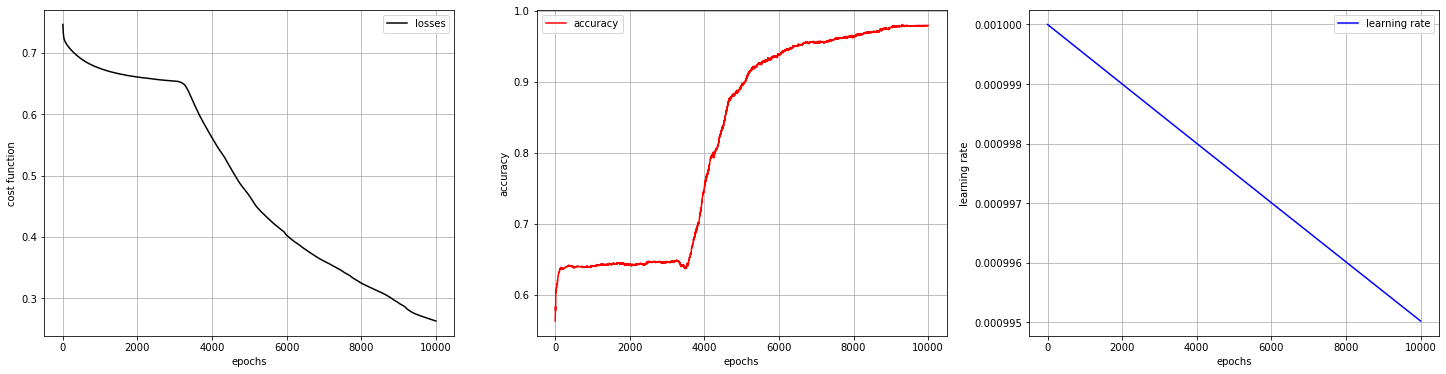

In [5]:
# Graphs

fig1 = plt.figure(figsize = (25, 6))

# loss graph
plt.subplot(1, 3, 1)
plt.plot(range(epochs), overall_loss_list, label = 'losses', c ='black')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('cost function')
plt.legend()

# accuracy graph
plt.subplot(1, 3, 2)
plt.plot(range(epochs), accuracy_list, label = 'accuracy', c= 'red')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# learning rate graph
plt.subplot(1, 3, 3)
plt.plot(range(epochs), learning_rate_list, label = 'learning rate', c = 'blue')
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('learning rate')
plt.legend()